In [1]:
import numpy as np
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import np_utils
from keras.callbacks import ModelCheckpoint
from keras.models import model_from_json
from sklearn.metrics import roc_auc_score
import random
import matplotlib.pyplot as plt
from PIL import Image

Using TensorFlow backend.


In [2]:
# Загружаем данные
(X_train, y_train), (X_test, y_test) = mnist.load_data()


15286272/15296311 [============================>.] - ETA: 0s  

In [3]:
# define model
def my_model():
    # Загружаем модель
    jfile = open("model.json", "r")
    loaded_json = jfile.read()
    jfile.close()
    loaded_model = model_from_json(loaded_json)

    # Загружаем веса
    loaded_model.load_weights("weights.hdf5")

    # Компилируем модель
    loaded_model.compile(loss="categorical_crossentropy",
                         optimizer="adam", metrics=["accuracy"])
    print(loaded_model.summary())

    return loaded_model

In [ ]:
model = my_model()

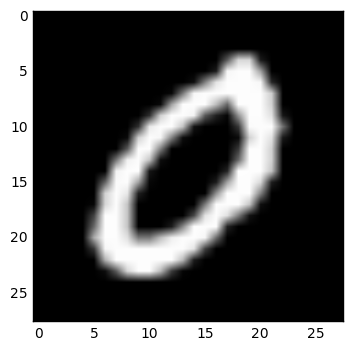

Класс: 0
Предсказано: 0


In [33]:
m_test, _, _ = X_test.shape 

k = random.randint(0, m_test)

yrand = y_test[k]
Xrand = X_test[k]
            
predictions = model.predict(Xrand.reshape(1, 784))
predictions = np.argmax(predictions)
plt.imshow(Xrand, cmap='gray')
plt.show()
print('Класс:', yrand)
print('Предсказано:', predictions)

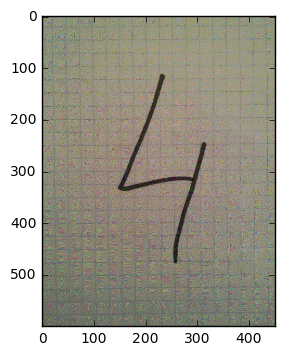

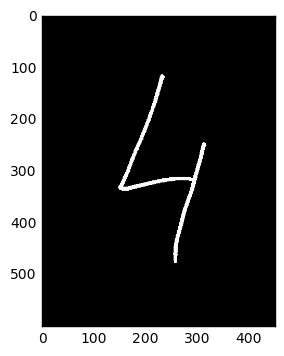

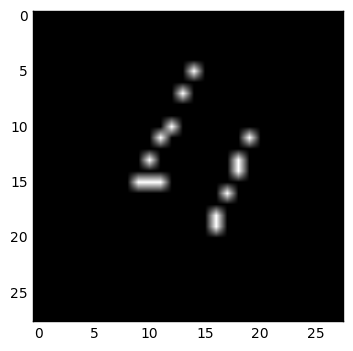

Предсказано: 4


In [45]:
# Открываем изображение
img = Image.open("image.jpg")
img = img.convert("P")
plt.imshow(img, cmap='gray')
plt.show()


# Конвертируем картинку (Фон - черный, Цифра - белый)
im2 = Image.new("P",img.size,0)
im = img.convert("P")
temp = {}
for x in range(im.size[1]):
      for y in range(im.size[0]):
        pix = im.getpixel((y,x))
        temp[pix] = pix
        if pix in range(0, 60):
            im2.putpixel((y,x),255)

plt.imshow(im2, cmap='gray')
plt.show()

# Уменьшаем размер до 28*28 пикселей 
size = 28, 28
img = im2.resize(size, resample=0)

# Приводим изображение к формату NumPy
img = np.array(img)

# Предсказываем цифру на изображении
predictions = model.predict(img.reshape(1, 784))
predictions = np.argmax(predictions)

plt.imshow(img, cmap='gray')
plt.show()
print('Предсказано:', predictions)